# Statistical significance test on data from all four experiments
## Each experiment is executed 50 times for 20 minutes
* Date: 24/09/2020
* Author: Sedar Olmez

In [1]:
# Packages to be used
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from pathlib import Path
sb.set()

In [2]:
#Statistical significance test

# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


In [3]:
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.262, p=0.025
Different distributions (reject H0)


In [4]:
# compare samples
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.372, p=0.020
Different distributions (reject H0)


In [5]:
#ANOVA test is a possible option, it tests the significance of N groups over various timepoints.

In [5]:
# Get the names of all the .csv's for each experiment and store in list.
import os

newlist_ex1 = []
newlist_ex2 = []
newlist_ex3 = []
newlist_ex4 = []

def get_all_csvs(experiment_link, list_to_fill):
    items = os.listdir(experiment_link)
    for names in items:
        if names.endswith("prey.csv"):
            list_to_fill.append(names)

        
get_all_csvs("Experiment_1-results", newlist_ex1)
get_all_csvs("Experiment_2-results", newlist_ex2)
get_all_csvs("Experiment_3-results", newlist_ex3)
get_all_csvs("Experiment_4-results", newlist_ex4)

In [7]:
# Here we iterate through each csv and turn it into a dataframe.
index = 0
data = pd.DataFrame()
for filename in newlist:
    dataframes_ex1 = pd.read_csv("Experiment_1-results/" + filename)
    dataframes_ex1['Run'] = index
    data = pd.concat([data, dataframes_ex1], sort=False)
    #print(index)
    index = index + 1
    

NameError: name 'newlist' is not defined

In [6]:
# Get the last 5 rows for each .csv and create column with each stating which sample it is from.
exp1 = "Experiment_1-results/"
exp2 = "Experiment_2-results/"
exp3 = "Experiment_3-results/"
exp4 = "Experiment_4-results/"

def concatenate_data(list_of_filenames, exp):
    index = 0
    data_new = pd.DataFrame()
    for filename in list_of_filenames:
        dataframes_ex = pd.read_csv(exp + filename)
        dataframes_ex = dataframes_ex.tail()
        dataframes_ex['Run'] = index
        data_new = pd.concat([data_new, dataframes_ex], sort=False)
        #print(index)
        index = index + 1
        
    return data_new

experiment1_dataframe = concatenate_data(newlist_ex1, exp1)
experiment2_dataframe = concatenate_data(newlist_ex2, exp2)
experiment3_dataframe = concatenate_data(newlist_ex3, exp3)
experiment4_dataframe = concatenate_data(newlist_ex4, exp4)


## 20 minutes produced 5880 rows of data per run for 50 runs = 294000 rows across all experiments

In [8]:
data.info()

NameError: name 'data' is not defined

In [7]:
# storing the last 5 rows which holds the total points gained by each agent to create a graph to display all results.
# Drop all columns that we don't need.
columns = ["AgentID", "Velocity", "xAxisPos", "zAxisPos", "touchedWall", "date-time"]
experiment1_mc1dataframe = experiment1_dataframe.drop(columns, 1)
experiment1_mc2dataframe = experiment2_dataframe.drop(columns, 1)
experiment2_mc1dataframe = experiment3_dataframe.drop(columns, 1)
experiment2_mc2dataframe = experiment2_dataframe.drop(columns, 1)
experiment2_mc3dataframe = experiment4_dataframe.drop(columns, 1)

In [8]:
#data = data.rename(columns={"GoodPointAmount": "PositivePointAmount", "BadPointAmount": "NegativePointAmount"})
experiment1_mc1dataframe = experiment1_mc1dataframe.rename(columns={"GoodPointAmount": "PositivePointAmount", "BadPointAmount": "NegativePointAmount", "seenBySnatcher": "seenByPredator"})
experiment1_mc2dataframe = experiment1_mc2dataframe.rename(columns={"GoodPointAmount": "PositivePointAmount", "BadPointAmount": "NegativePointAmount", "seenBySnatcher": "seenByPredator"})
experiment2_mc1dataframe = experiment2_mc1dataframe.rename(columns={"GoodPointAmount": "PositivePointAmount", "BadPointAmount": "NegativePointAmount", "seenBySnatcher": "seenByPredator"})
experiment2_mc2dataframe = experiment2_mc2dataframe.rename(columns={"GoodPointAmount": "PositivePointAmount", "BadPointAmount": "NegativePointAmount", "seenBySnatcher": "seenByPredator"})
experiment2_mc3dataframe = experiment2_mc3dataframe.rename(columns={"GoodPointAmount": "PositivePointAmount", "BadPointAmount": "NegativePointAmount", "seenBySnatcher": "seenByPredator"})

experiment1_mc1dataframe['Experiment'] = 11
experiment1_mc2dataframe['Experiment'] = 12
experiment2_mc1dataframe['Experiment'] = 21
experiment2_mc2dataframe['Experiment'] = 22
experiment2_mc3dataframe['Experiment'] = 23

# experiment1_dataframe['positive-negative point'] = experiment1_dataframe['PositivePointAmount'] - experiment1_dataframe['NegativePointAmount']
# experiment2_dataframe['positive-negative point'] = experiment2_dataframe['PositivePointAmount'] - experiment2_dataframe['NegativePointAmount']
# experiment3_dataframe['positive-negative point'] = experiment3_dataframe['PositivePointAmount'] - experiment3_dataframe['NegativePointAmount']
# experiment4_dataframe['positive-negative point'] = experiment4_dataframe['PositivePointAmount'] - experiment4_dataframe['NegativePointAmount']

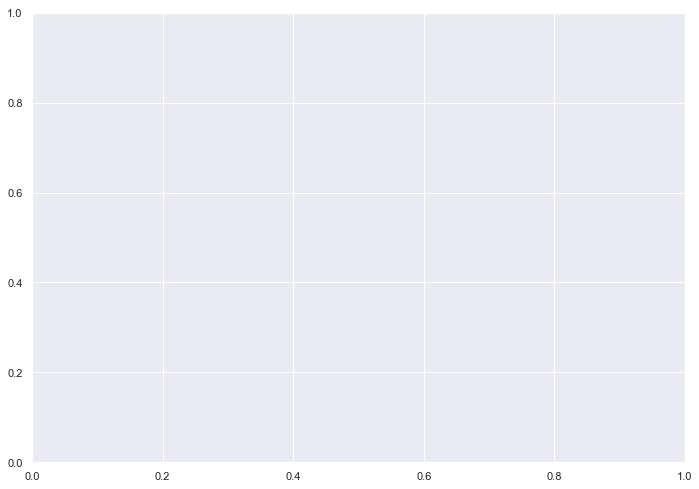

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

In [9]:
# This is where we calculate the task efficiency columns and condense the dataframes to sum the number of experiments per run.
experiment1_mc1dataframe = experiment1_mc1dataframe.groupby(['Run']).sum()
experiment1_mc2dataframe = experiment1_mc2dataframe.groupby(['Run']).sum()
experiment2_mc1dataframe = experiment2_mc1dataframe.groupby(['Run']).sum()
experiment2_mc2dataframe = experiment2_mc2dataframe.groupby(['Run']).sum()
experiment2_mc3dataframe = experiment2_mc3dataframe.groupby(['Run']).sum()

In [10]:
experiment1_mc1dataframe['taskEfficiencyTwoPNP'] = experiment1_mc1dataframe['PositivePointAmount'] - (experiment1_mc1dataframe['NegativePointAmount'] * 0.2) - (experiment1_mc1dataframe['seenByPredator'] * 1)
experiment1_mc1dataframe['taskEfficiencyOnePN'] = experiment1_mc1dataframe['PositivePointAmount'] - (experiment1_mc1dataframe['NegativePointAmount'] * 0.2)

experiment1_mc2dataframe['taskEfficiencyTwoPNP'] = experiment1_mc2dataframe['PositivePointAmount'] - (experiment1_mc2dataframe['NegativePointAmount'] * 0.2) - (experiment1_mc2dataframe['seenByPredator'] * 1)
experiment1_mc2dataframe['taskEfficiencyOnePN'] = experiment1_mc2dataframe['PositivePointAmount'] - (experiment1_mc2dataframe['NegativePointAmount'] * 0.2)

experiment2_mc1dataframe['taskEfficiencyTwoPNP'] = experiment2_mc1dataframe['PositivePointAmount'] - (experiment2_mc1dataframe['NegativePointAmount'] * 0.2) - (0)
experiment2_mc1dataframe['taskEfficiencyOnePN'] = experiment2_mc1dataframe['PositivePointAmount'] - (experiment2_mc1dataframe['NegativePointAmount'] * 0.2)

experiment2_mc2dataframe['taskEfficiencyTwoPNP'] = experiment2_mc2dataframe['PositivePointAmount'] - (experiment2_mc2dataframe['NegativePointAmount'] * 0.2) - (experiment2_mc2dataframe['seenByPredator'] * 1)
experiment2_mc2dataframe['taskEfficiencyOnePN'] = experiment2_mc2dataframe['PositivePointAmount'] - (experiment2_mc2dataframe['NegativePointAmount'] * 0.2)

experiment2_mc3dataframe['taskEfficiencyTwoPNP'] = experiment2_mc3dataframe['PositivePointAmount'] - (experiment2_mc3dataframe['NegativePointAmount'] * 0.2) - (experiment2_mc3dataframe['seenByPredator'] * 1)
experiment2_mc3dataframe['taskEfficiencyOnePN'] = experiment2_mc3dataframe['PositivePointAmount'] - (experiment2_mc3dataframe['NegativePointAmount'] * 0.2)




In [13]:
experiment2_mc3dataframe.head()

,PositivePointAmount,NegativePointAmount,seenByPredator,update,Experiment,taskEfficiencyTwoPNP,taskEfficiencyOnePN
Run,,,,,,,
0,1509,522,86,299875,115,1318.6,1404.6
1,1537,572,93,299875,115,1329.6,1422.6
2,1635,507,95,299875,115,1438.6,1533.6
3,1469,539,99,299875,115,1262.2,1361.2
4,1471,474,99,299875,115,1277.2,1376.2


In [11]:
dataframes = [experiment1_mc1dataframe, experiment1_mc2dataframe, experiment2_mc1dataframe, experiment2_mc2dataframe, experiment2_mc3dataframe ]
result = pd.concat(dataframes, sort=False)


In [42]:
# Mean of an experiment
mean(new_experiment1_dataframe['taskEfficiencyTwoPNP'])

207.312

In [43]:
# Standard deviation of an experiment
new_experiment1_dataframe['taskEfficiencyTwoPNP'].std()

33.835307244452956

<Figure size 720x576 with 0 Axes>

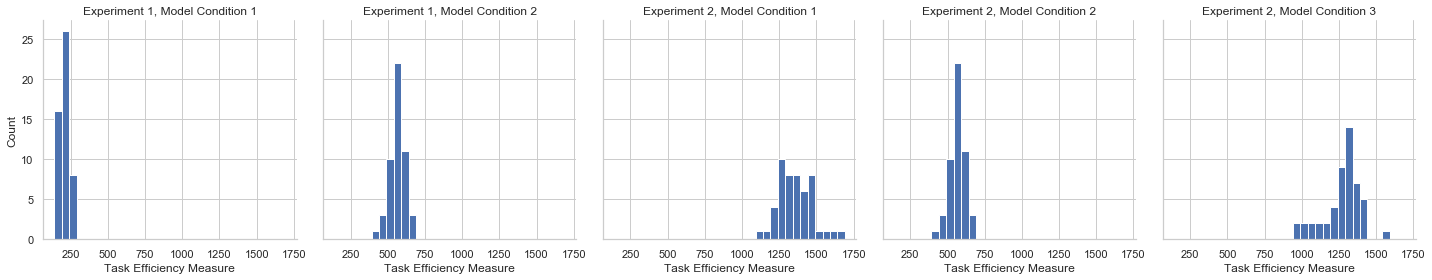

In [21]:
sb.set_style("whitegrid")
plt.figure(figsize=(10, 8))
variable = 'taskEfficiencyTwoPNP'
b_width = 50  # chose an arbitrary value here
my_bins = np.arange(min(result[variable]), max(result[variable]) + b_width, b_width)

g = sb.FacetGrid(result, col="Experiment", height=4, palette="colorblind")
g.map(plt.hist, variable, bins=my_bins)
axes = g.axes.flatten()
axes[0].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("Task Efficiency Measure")
    
for ax, title in zip(g.axes.flat, ['Experiment 1, Model Condition 1', 'Experiment 1, Model Condition 2', 'Experiment 2, Model Condition 1', 'Experiment 2, Model Condition 2', 'Experiment 2, Model Condition 3']):
    ax.set_title(title)

g.fig.tight_layout()
plt.savefig('TaskEfficiencyTwoComparisonAcrossExperimentsAndMC.png')

In [16]:
# Analysis of Variance Test ANOVA
from scipy.stats import f_oneway
stat, p = f_oneway(new_experiment2_dataframe['taskEfficiencyTwoPNP'], new_experiment3_dataframe['taskEfficiencyTwoPNP'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

NameError: name 'new_experiment2_dataframe' is not defined

Text(0, 0.5, 'Density')

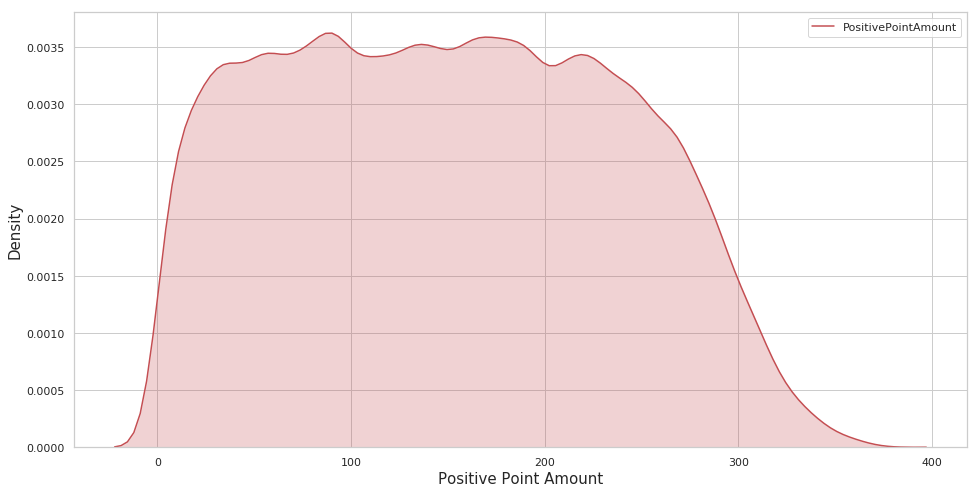

In [53]:
%matplotlib inline
plt.figure(figsize=(16, 8))
sb.kdeplot(data['PositivePointAmount'], shade=True, color="r")
#plt.title('Kernel Density Estimation of Positive Point Amount over 50 runs for Experiment 1', fontsize=20)
plt.xlabel('Positive Point Amount', fontsize=15)
plt.ylabel('Density', fontsize=15)

Text(0, 0.5, 'Density')

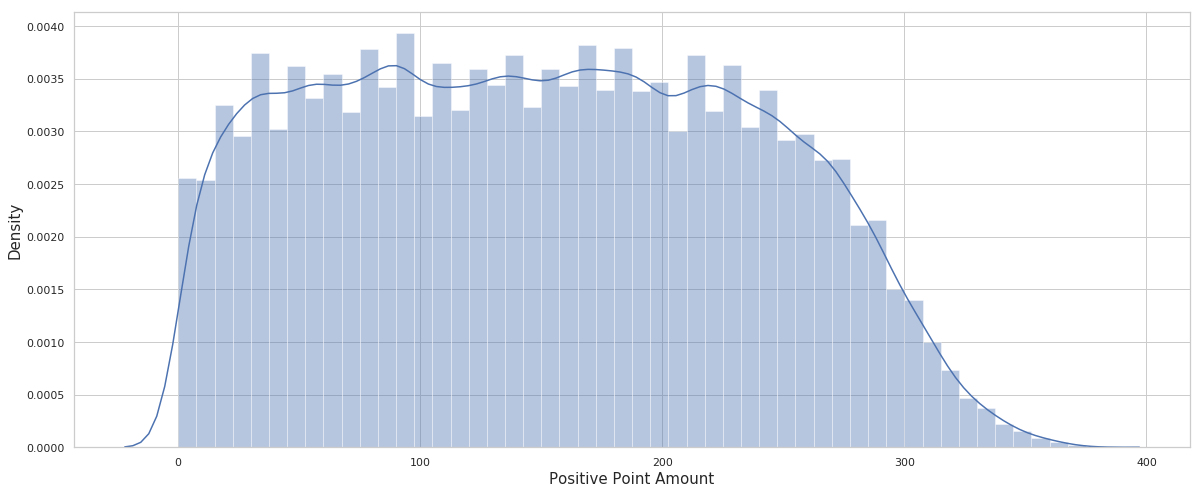

In [54]:
%matplotlib inline
sb.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sb.distplot(data['PositivePointAmount'], hist=True, kde=True)
#plt.title('Kernel Density Estimation of Positive Point Amount over 50 runs for Experiment 1', fontsize=20)
plt.xlabel('Positive Point Amount', fontsize=15)
plt.ylabel('Density', fontsize=15)
#plt.savefig('experiment3_50Samples_KernelDensityEstimation.png')

In [56]:
# 5 agents over 50 samples = 250 rows
print("Experiment 4 Sum of Positive Point Amount over all samples", data_new['PositivePointAmount'].sum())

Experiment 4 Sum of Positive Point Amount over all samples 73831


In [17]:
data['PositivePointAmount'].describe()

count    294000.000000
mean         32.949636
std          20.580483
min           0.000000
25%          16.000000
50%          31.000000
75%          48.000000
max         105.000000
Name: PositivePointAmount, dtype: float64

In [183]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [184]:
PositivePoint_and_runs = data[['PositivePointAmount', 'Run']]
NegativePoint_and_runs = data[['NegativePointAmount', 'Run']]

#stat, p = f_oneway(PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 0], PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 1],
#                  PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 2], PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 3],
#                  PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 4], PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 5])


# Dependent t-test, N samples from the same population pre and post change i.e. each run a random start.
stat, p = ttest_rel(PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 0], PositivePoint_and_runs['PositivePointAmount'][PositivePoint_and_runs['Run'] == 49])
print('Statistics=%.60f, p=%.60f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# If reject the Null hypothesis, the data favors the alternative hypothesis. Congratulations! Your results are statistically significant.

Statistics=37.851241194110549770357465604320168495178222656250000000000000, p=0.000000000000000000000000000000000000000000000000000000000000
Different distributions (reject H0)


In [185]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

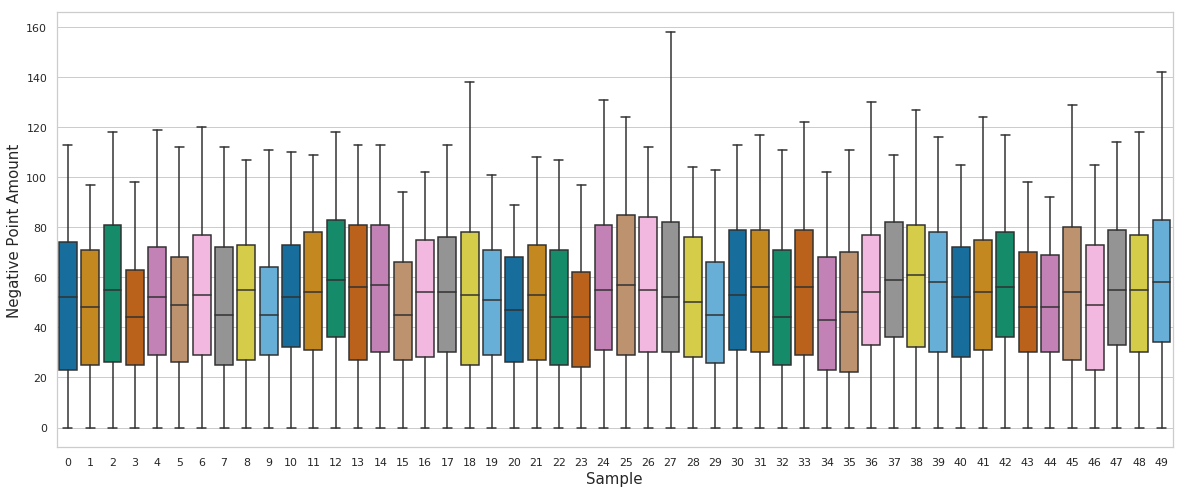

In [188]:
%matplotlib inline

sb.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sb.boxplot(x="Run", y="PositivePointAmount", data=PositivePoint_and_runs, palette="colorblind")

plt.xlabel('Sample', fontsize=15)
plt.ylabel('Positive Point Amount', fontsize=15)
plt.savefig('experiment3_50Samples_boxplot.png')

In [189]:
mod = ols('PositivePointAmount ~ Run', data = PositivePoint_and_runs).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PositivePointAmount   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     63.79
Date:                 Thu, 01 Oct 2020   Prob (F-statistic):           1.39e-15
Time:                         11:45:21   Log-Likelihood:            -1.7265e+06
No. Observations:               294000   AIC:                         3.453e+06
Df Residuals:                   293998   BIC:                         3.453e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    150.8510      0.312    483.151      0.000     150.239     151.463
Run           -0.0877      0.011     -7.987      0.000      -0.109      -0.066
==============================================================================
Omnibus:                    64774.393   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12838.361
Skew:                           0.131   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
print(f"Overall model F({mod.df_model: .0f},{mod.df_resid: .0f}) = {mod.fvalue: .30f}, p = {mod.f_pvalue: .30f}")

Overall model F( 1, 293998) =  63.786617087931389846744423266500, p =  0.000000000000001391477541221241


In [191]:
res = sm.stats.anova_lm(mod, typ= 2)

In [192]:
res

,sum_sq,df,F,PR(>F)
Run,4.708835e+05,1.0,63.786617,1.391478e-15
Residual,2.170342e+09,293998.0,NaN,NaN


Simply put, if you have significant result, it means that your results likely did not happen by chance. If you don’t have statistically significant results, you throw your test data out (as it doesn’t show anything!); in other words, you can’t reject the null hypothesis.

In general, if your calculated F value in a test is larger than your F statistic, you can reject the null hypothesis. However, the statistic is only one measure of significance in an F Test. You should also consider the p value. The p value is determined by the F statistic and is the probability your results could have happened by chance.

The F value in one way ANOVA is a tool to help you answer the question “Is the variance between the means of two populations significantly different?” The F value in the ANOVA test also determines the P value; The P value is the probability of getting a result at least as extreme as the one that was actually observed, given that the null hypothesis is true.

The p value is a probability, while the f ratio is a test statistic, calculated as:

F value = variance of the group means (Mean Square Between) / mean of the within group variances (Mean Squared Error)